ANÁLISIS EXPLORATORIO DE LOS DATOS

Este notebook separa en tres secciones (Clientes, Vendedores, Productos) los insights junto con sus respectivas querys.

Antes de ejecutar las celdas, agregar al path el script de conexión:

In [2]:
import os
import sys

script_dir = os.path.abspath(os.path.join(os.getcwd(), '../scripts'))

if script_dir not in sys.path:
    sys.path.append(script_dir)

SOBRE LOS CLIENTES

Distribución geográfica:

C:\Users\minom\AppData\Local\Temp\ipykernel_4188\2179527095.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_clientes_por_estado= pd.read_sql_query(query, conexion)


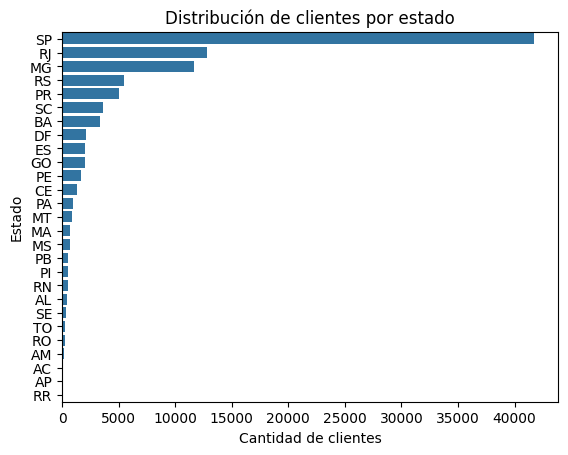

In [ ]:
from csv_to_table_script import conectar_db
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conexion = conectar_db()

query = """ 
        SELECT customer_state,
                COUNT(*) as orders_per_state
        FROM customers
        GROUP BY customer_state
        ORDER BY orders_per_state DESC
        """

df_clientes_por_estado= pd.read_sql_query(query, conexion)

grafico = sns.barplot(
    x='orders_per_state', 
    y='customer_state', 
    data=df_clientes_por_estado,
)

plt.title('Distribución de clientes por estado')
plt.xlabel('Cantidad de clientes')
plt.ylabel('Estado')

plt.show()

conexion.close()

Distribución del valor por pedido:

C:\Users\minom\AppData\Local\Temp\ipykernel_4188\2257056564.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_valor_por_estado= pd.read_sql_query(query, conexion)


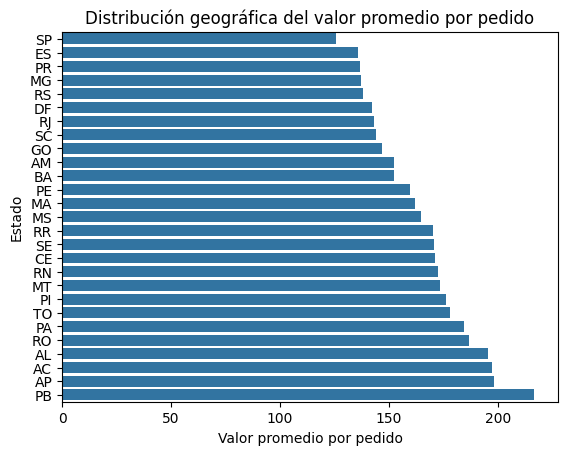

In [ ]:
from csv_to_table_script import conectar_db
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conexion = conectar_db()

query = """ 
        select customer_state,
    sum(total_orders.value_per_order) as value_per_state,
    avg(total_orders.value_per_order) as average_value_per_order,
    count(distinct order_all.order_id) as number_of_orders
    from  customers
        join order_all on customers.customer_id=order_all.customer_id
        join (
            SELECT 
                order_id, 
                SUM(price) as value_per_order
            FROM 
                order_items
            GROUP BY 
                order_id
            ) as total_orders on order_all.order_id = total_orders.order_id
    group by customer_state 
    order by average_value_per_order
        """

df_valor_por_estado= pd.read_sql_query(query, conexion)

grafico = sns.barplot(
    x='average_value_per_order', 
    y='customer_state', 
    data=df_valor_por_estado,
)

plt.title('Distribución geográfica del valor promedio por pedido')
plt.xlabel('Valor promedio por pedido')
plt.ylabel('Estado')

plt.show()

conexion.close()

SOBRE LOS PEDIDOS (ORDERS):

Rentabilidad por categoría:

C:\Users\minom\AppData\Local\Temp\ipykernel_4188\394779771.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rentabilidad= pd.read_sql_query(query, conexion)


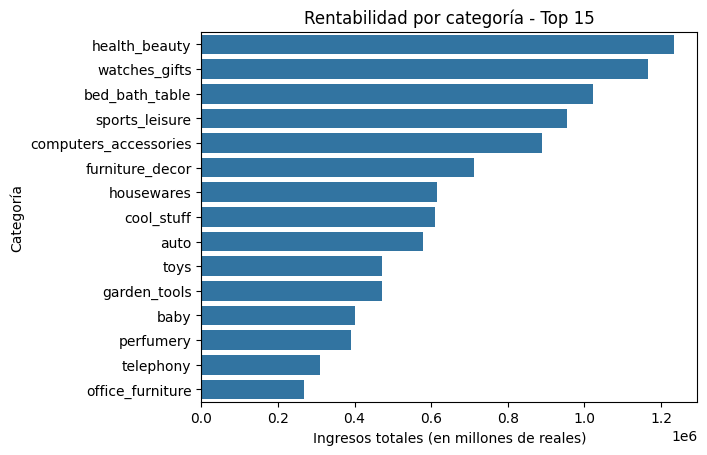

In [ ]:
from csv_to_table_script import conectar_db
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conexion = conectar_db()

query = """ 
        SELECT
            t.product_category_name_english AS category_name,
            SUM(oi.price) AS total_revenue
        FROM
            order_items oi
        JOIN
            products p ON oi.product_id = p.product_id
        JOIN
            translations t ON p.product_category_name = t.product_category_name
        JOIN
            order_all o ON oi.order_id = o.order_id
        WHERE
            o.order_status = 'delivered'
        GROUP BY
            t.product_category_name_english
        ORDER BY
            total_revenue DESC
        LIMIT 15;
        """

df_rentabilidad= pd.read_sql_query(query, conexion)

grafico = sns.barplot(
    x='total_revenue', 
    y='category_name', 
    data=df_rentabilidad
)

plt.title('Rentabilidad por categoría - Top 15')
plt.xlabel('Ingresos totales (en millones de reales)')
plt.ylabel('Categoría')

plt.show()

conexion.close()